## Project 

**FIND PROTOGONIST OF ANY BOOK**

In [2]:
import PyPDF2
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.util import ngrams
from collections import Counter
import re
import math
import nltk
from nltk.corpus import wordnet as wn
from nltk import pos_tag
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#pip install matplotlib_venn

**STEP 1 :** First we read the text of the .pdf file and store in a variable.

In [4]:
def load_and_return_pdf_book(path):
    pdfFileObj = open(path, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    text = ""
    for i in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(i)
        text += pageObj.extractText()
    return text

In [5]:
da_vinci_code = load_and_return_pdf_book('TheDaVinciCode.pdf')

In [6]:
digital_fortress = load_and_return_pdf_book('Dan Brown - Digital Fortress-Corgi Books (2004).pdf')

In [7]:
lost_symbol = load_and_return_pdf_book('The_Lost_Symbol.pdf')

The books contains index ,acknowledgement and preface in the start which might gives us wrong answer. So, we are manually splitting the data to load the book starting from chapter contents.

In [8]:
da_vinci_code

'The Da Vinci CodeDan Brown FOR BLYTHE... AGAIN. MORE THAN EVER. AcknowledgmentsFirst and foremost, to my friend and editor, Jason Kaufman, for working so hard on this project and for truly understanding what this book is all about. And to the incomparable Heide LangeŠtireless \nchampion of The Da Vinci Code, agent extraordinaire, and trusted friend.I cannot fully express my gratitude to the exceptional team at Doubleday, for their generosity, faith, \nand superb guidance. Thank you especially to Bill Thomas and Steve Rubin, who believed in this \nbook from the start. My thanks also to the initial core of early in-house supporters, headed by \nMichael Palgon, Suzanne Herz, Janelle Moburg, Jackie Everly, and Adrienne Sparks, as well as to \nthe talented people of Doubleday\'s sales force.For their generous assistance in the research of the book, I would like to acknowledge the Louvre \nMuseum, the French Ministry of Culture, Project Gutenberg, Bibliothèque Nationale, the Gnostic \nSocie

In [9]:
dan = da_vinci_code.split("second of his life. CHAPTER 1")

In [10]:
da_vinci_code=dan[1]

In [11]:
da_vinci_code

'Robert Langdon awoke slowly.A telephone was ringing in the darknessŠa tinny, unfamiliar ring. He fumbled for the bedside \nlamp and turned it on. Squinting at his surroundings he saw a plush Renaissance bedroom with \nLouis XVI furniture, hand-frescoed walls, and a colossal mahogany four-poster bed.Where the hell am I?The jacquard bathrobe hanging on his bedpost bore the monogram: HOTEL RITZ PARIS.Slowly, the fog began to lift.Langdon picked up the receiver. "Hello?""Monsieur Langdon?" a man\'s voice said. "I hope I have not awoken you?"Dazed, Langdon looked at the bedside clock. It was 12:32 A.M. He had been asleep only an hour, \nbut he felt like the dead."This is the concierge, monsieur. I apologize for this intrusion, but you have a visitor. He insists it \nis urgent."Langdon still felt fuzzy. A visitor? His eyes focused now on a crumpled flyer on his bedside table.THE AMERICAN UNIVERSITY OF PARISproudly presentsAN EVENING WITH ROBERT LANGDONPROFESSOR OF RELIGIOUS SYMBOLOGY,HARVAR

In [12]:
digital_fortress

'DIGITAL FORTRESS Dan Brown  For my parents... my mentors and heroes  A debt of gratitude: to my editors at St. Martin\'s Press, Thomas Dunne and the exceptionally talented Melissa Jacobs. To my agents in New York, George Wieser, Olga Wieser, and Jake Elwell. To all those who read and contributed to the manuscript along the way. And especially to my wife, Blythe, for her enthusiasm and patience. Also... a quiet thank you to the two faceless ex-NSA cryptographers who made invaluable contributions via anonymous remailers. Without them this book would not have been written.   PROLOGUE  PLAZA DE ESPAÑA SEVILLE, SPAIN 11:00 A.M. It is said that in death, all things become clear; Ensei Tankado now knew it was true. As he clutched his chest and fell to the ground in pain, he realized the horror of his mistake. People appeared, hovering over him, trying to help. But Tankado did not want help--it was too late for that. Trembling, he raised his left hand and held his fingers outward. Look at my 

In [13]:
digital_fortress=digital_fortress.replace("\'","'")


In [14]:
digi = digital_fortress.split(" would ever see.  ")

In [15]:
digital_fortress =digi[1]

In [16]:
lost_symbol

" \n \n \n \nContents\n \n \nDedication\n \n \nAcknowledgments\n \n \nQuote\n \n \nFact\n \n \nPrologue\n \n \nChapter 1\n \n \nChapter 2\n \n \nChapter 3\n \n \nChapter 4\n \n \nChapter 5\n \n \nChapter 6\n \n \nChapter 7\n \n \nChapter 8\n \n \nChapter 9\n \n \nChapter 10\n \n \nChapter 11\n \n \nChapter 12\n \n \nChapter 13\n \n \nChapter 14\n \n \nChapter 15\n \n \nChapter 16\n \n \nChapter 17\n \n \nChapter 18\n \n \nChapter 19\n \n \nChapter 20\n \n \nChapter 21\n \n \nChapter 22\n \n \nChapter 23\n \n \nChapter 24\n \n \nChapter 25\n \n \nChapter 26\n \n \nChapter 27\n \n \nChapter 28\n \n \nChapter 29\n \n \nChapter 30\n \n \nChapter 31\n \n \nChapter 32\n \n \nChapter 33\n \n \nChapter 34\n \n \nChapter 35\n \n \nChapter 36\n \n \nChapter 37\n \n \nChapter 38\n \n \nChapter 39\n \n \nChapter 40\n \n \nChapter 41\n \n \nChapter 42\n \n \nChapter 43\n \n \nChapter 44\n \n \nChapter 45\n \n \nChapter 46\n \n \nChapter 47\n \n \nChapter 48\n \n \nChapter 49\n \n \nChapter 50\n \n 

In [17]:
los = lost_symbol.split("\n \n \n \n \n \n \nCHAPTER\n 1 \n \n \n \n")

In [18]:
lost_symbol=los[1]

In [19]:
lost_symbol

"The Otis\n elevator climbing the south pillar of\n the Eiffel Tower was overflowing with \ntourists. Inside the cramped lift, an auster\ne businessman in a pressed suit gazed down at \nthe boy beside him. ﬁYou look pale, s\non. You should have stayed on the ground.ﬂ \n \nﬁI™m okay . . .ﬂ the boy answered, struggling \nto control his anxiet\ny. ﬁI™ll get out on the \nnext level.ﬂ \nI can™t breathe.\n \n \nThe man leaned closer. ﬁI thought by now you \nwould have gotten over this.ﬂ He brushed \nthe child™s cheek affectionately. \n \nThe boy felt ashamed to disappoint his fath\ner, but he could bare\nly hear through the \nringing in his ears. \nI can™t breathe. I™ve got to get out of this box!\n \n \nThe elevator operator was saying something r\neassuring about the lift™s articulated pistons \nand puddled-iron construction. Far beneath them, \nthe streets of Paris stretched out in all \ndirections. \n \nAlmost there,\n the boy told himself, craning his \nneck and looking up at the unload

In [20]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

**STEP 2:** Split the entire document into words. Filers these words , to retains only those words which contains valid aplbhabets as contents. This will further clean the data

In [21]:
digital_fortress_words = nltk.word_tokenize(digital_fortress)

digital_fortress_words=[word for word in digital_fortress_words if word.isalpha()]

print(digital_fortress_words)

['CHAPTER', 'They', 'were', 'in', 'the', 'smoky', 'mountains', 'at', 'their', 'favorite', 'David', 'was', 'smiling', 'down', 'at', 'her', 'What', 'do', 'you', 'say', 'gorgeous', 'Marry', 'me', 'Looking', 'up', 'from', 'their', 'canopy', 'bed', 'she', 'knew', 'he', 'was', 'the', 'one', 'Forever', 'As', 'she', 'stared', 'into', 'his', 'eyes', 'somewhere', 'in', 'the', 'distance', 'a', 'deafening', 'bell', 'began', 'to', 'ring', 'It', 'was', 'pulling', 'him', 'away', 'She', 'reached', 'for', 'him', 'but', 'her', 'arms', 'clutched', 'empty', 'air', 'It', 'was', 'the', 'sound', 'of', 'the', 'phone', 'that', 'fully', 'awoke', 'Susan', 'Fletcher', 'from', 'her', 'dream', 'She', 'gasped', 'sat', 'up', 'in', 'bed', 'and', 'fumbled', 'for', 'the', 'receiver', 'Hello', 'Susan', 'it', 'David', 'Did', 'I', 'wake', 'you', 'She', 'smiled', 'rolling', 'over', 'in', 'bed', 'I', 'was', 'just', 'dreaming', 'of', 'you', 'Come', 'over', 'and', 'play', 'He', 'laughed', 'It', 'still', 'dark', 'out', 'Mmm', '

After observing the tokenized words we see some junk words and we need these words in stopwords lists

In [22]:

stop_words=set(stopwords.words("english"))
stop_words.add("fi")
stop_words.add("ﬂ")
stop_words.add("ﬁi")
print(stop_words)



{"shouldn't", 'has', 'itself', 'such', 'm', 'y', 'who', 'didn', 'while', 'nor', 'having', "needn't", 'ma', 'do', 'yourselves', 'don', 'did', 'being', "you've", "wouldn't", 'up', 'herself', 'same', 'just', "mustn't", 'all', 'once', 'he', 'what', 'their', 'my', 'his', 'it', 'for', 'at', 'there', 'some', 'were', 'both', 'doing', 'we', 'to', 'a', 'over', 'now', 'as', 'or', 'above', 'after', 'then', 'with', 'ﬂ', 'and', "should've", "wasn't", 'below', 'before', 't', 'will', 'in', "don't", 'they', 'couldn', 'theirs', "it's", 's', 'doesn', 'out', 'mightn', 'ain', 'should', 'me', 'fi', 'ours', 'your', "hadn't", 'no', 'she', 've', 'so', 'can', 'am', "you're", 'i', 'more', 'had', 'ourselves', "won't", "you'd", 'an', 'our', 'until', 'on', 'that', 'during', 'between', 'shouldn', 'you', 'yourself', 'wasn', 'any', "hasn't", "that'll", 'll', 'won', 'those', 'where', 'the', "mightn't", 'why', 'by', 'how', 're', 'too', 'have', 'myself', 'isn', 'from', 'if', 'hadn', 'mustn', 'd', 'very', 'than', 'into', 

**STEP 3:** Remove the stop words from word token's list

In [23]:
digital_fortress_filtered_sent=[]
for w in digital_fortress_words:
    if w not in stop_words:
        digital_fortress_filtered_sent.append(w)
print("Tokenized Sentence:",digital_fortress_words)
print("Filterd Sentence:",digital_fortress_filtered_sent)

Tokenized Sentence: ['CHAPTER', 'They', 'were', 'in', 'the', 'smoky', 'mountains', 'at', 'their', 'favorite', 'David', 'was', 'smiling', 'down', 'at', 'her', 'What', 'do', 'you', 'say', 'gorgeous', 'Marry', 'me', 'Looking', 'up', 'from', 'their', 'canopy', 'bed', 'she', 'knew', 'he', 'was', 'the', 'one', 'Forever', 'As', 'she', 'stared', 'into', 'his', 'eyes', 'somewhere', 'in', 'the', 'distance', 'a', 'deafening', 'bell', 'began', 'to', 'ring', 'It', 'was', 'pulling', 'him', 'away', 'She', 'reached', 'for', 'him', 'but', 'her', 'arms', 'clutched', 'empty', 'air', 'It', 'was', 'the', 'sound', 'of', 'the', 'phone', 'that', 'fully', 'awoke', 'Susan', 'Fletcher', 'from', 'her', 'dream', 'She', 'gasped', 'sat', 'up', 'in', 'bed', 'and', 'fumbled', 'for', 'the', 'receiver', 'Hello', 'Susan', 'it', 'David', 'Did', 'I', 'wake', 'you', 'She', 'smiled', 'rolling', 'over', 'in', 'bed', 'I', 'was', 'just', 'dreaming', 'of', 'you', 'Come', 'over', 'and', 'play', 'He', 'laughed', 'It', 'still', 'da

**STEP 4:** We now calculate the frequency of the words in the book and store the most common 50 words in "common_words"

In [24]:
digital_fortress_fdist_fil = FreqDist(digital_fortress_filtered_sent)
print(digital_fortress_fdist_fil)

<FreqDist with 9685 samples and 62267 outcomes>


In [25]:
common_words=digital_fortress_fdist_fil.most_common(50)
common_word_names = np.array(common_words)[:, 0]
unique_string=(" ").join(common_word_names)

In [26]:
common_word_names

array(['The', 'I', 'Susan', 'He', 'Becker', 'Strathmore', 'It', 'She',
       'Hale', 'would', 'Tankado', 'could', 'said', 'back', 'You', 'NSA',
       'like', 'one', 'Jabba', 'TRANSLTR', 'David', 'But', 'looked',
       'There', 'A', 'knew', 'man', 'thought', 'What', 'Midge',
       'Fontaine', 'time', 'never', 'We', 'eyes', 'know', 'Crypto', 'got',
       'way', 'ring', 'Brinkerhoff', 'His', 'door', 'voice', 'turned',
       'As', 'right', 'CHAPTER', 'long', 'get'], dtype='<U11')

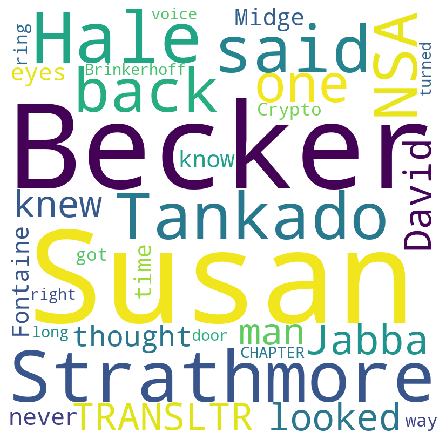

In [27]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(unique_string)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**STEP 5:** Let's perform an NLP task on this filtered words: Let's filter all the  **proper-noun** in the dataset (i.e. tagged with a "NNP" Part-Of-Speech (POS) tag):

In [28]:
pos_digital_fortress=nltk.pos_tag(digital_fortress_fdist_fil)

In [29]:
pos_digital_fortress

[('CHAPTER', 'NN'),
 ('They', 'PRP'),
 ('smoky', 'VBP'),
 ('mountains', 'NNS'),
 ('favorite', 'JJ'),
 ('David', 'NNP'),
 ('smiling', 'VBG'),
 ('What', 'WP'),
 ('say', 'VBP'),
 ('gorgeous', 'JJ'),
 ('Marry', 'NNP'),
 ('Looking', 'NNP'),
 ('canopy', 'NN'),
 ('bed', 'VBD'),
 ('knew', 'VBD'),
 ('one', 'CD'),
 ('Forever', 'NNP'),
 ('As', 'IN'),
 ('stared', 'JJ'),
 ('eyes', 'NNS'),
 ('somewhere', 'RB'),
 ('distance', 'VBP'),
 ('deafening', 'VBG'),
 ('bell', 'NN'),
 ('began', 'VBD'),
 ('ring', 'VBG'),
 ('It', 'PRP'),
 ('pulling', 'VBG'),
 ('away', 'RB'),
 ('She', 'PRP'),
 ('reached', 'VBD'),
 ('arms', 'NNS'),
 ('clutched', 'VBN'),
 ('empty', 'JJ'),
 ('air', 'NN'),
 ('sound', 'VBD'),
 ('phone', 'NN'),
 ('fully', 'RB'),
 ('awoke', 'VBD'),
 ('Susan', 'NNP'),
 ('Fletcher', 'NNP'),
 ('dream', 'NN'),
 ('gasped', 'VBD'),
 ('sat', 'JJR'),
 ('fumbled', 'VBN'),
 ('receiver', 'NN'),
 ('Hello', 'NNP'),
 ('Did', 'NNP'),
 ('I', 'PRP'),
 ('wake', 'VBP'),
 ('smiled', 'JJ'),
 ('rolling', 'VBG'),
 ('dreaming',

In [30]:
digital_fortress_proper_nouns=[s for s in pos_digital_fortress if s[1] == 'NNP']
digital_fortress_proper_nouns_name = np.array(digital_fortress_proper_nouns)[:, 0]
proper_nouns_string=(" ").join(digital_fortress_proper_nouns_name)

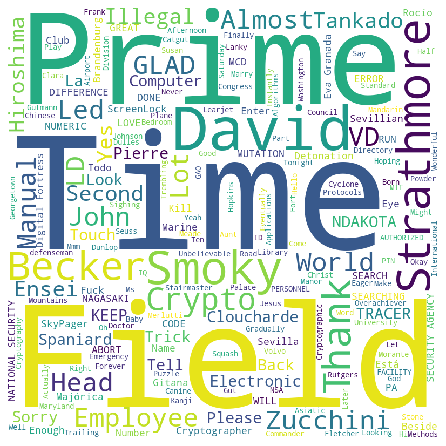

In [31]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(proper_nouns_string)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [32]:
digital_fortress_proper_nouns

[('David', 'NNP'),
 ('Marry', 'NNP'),
 ('Looking', 'NNP'),
 ('Forever', 'NNP'),
 ('Susan', 'NNP'),
 ('Fletcher', 'NNP'),
 ('Hello', 'NNP'),
 ('Did', 'NNP'),
 ('Come', 'NNP'),
 ('Mmm', 'NNP'),
 ('Stone', 'NNP'),
 ('Manor', 'NNP'),
 ('Tonight', 'NNP'),
 ('Plane', 'NNP'),
 ('Later', 'NNP'),
 ('Smoky', 'NNP'),
 ('Mountains', 'NNP'),
 ('Where', 'NNP'),
 ('Gradually', 'NNP'),
 ('Strathmore', 'NNP'),
 ('Oh', 'NNP'),
 ('Good', 'NNP'),
 ('Commander', 'NNP'),
 ('Hoping', 'NNP'),
 ('Becker', 'NNP'),
 ('Do', 'NNP'),
 ('Thank', 'NNP'),
 ('Saturday', 'NNP'),
 ('Emergency', 'NNP'),
 ('Crypto', 'NNP'),
 ('Make', 'NNP'),
 ('Learjet', 'NNP'),
 ('Wonderful', 'NNP'),
 ('Volvo', 'NNP'),
 ('Cyclone', 'NNP'),
 ('A', 'NNP'),
 ('ID', 'NNP'),
 ('Finally', 'NNP'),
 ('Ms', 'NNP'),
 ('Half', 'NNP'),
 ('Canine', 'NNP'),
 ('Road', 'NNP'),
 ('Employee', 'NNP'),
 ('Lot', 'NNP'),
 ('Unbelievable', 'NNP'),
 ('NATIONAL', 'NNP'),
 ('SECURITY', 'NNP'),
 ('AGENCY', 'NNP'),
 ('NSA', 'NNP'),
 ('CRYPTO', 'NNP'),
 ('FACILITY', 

In [33]:
common_words

[('The', 1081),
 ('I', 1045),
 ('Susan', 1012),
 ('He', 957),
 ('Becker', 804),
 ('Strathmore', 675),
 ('It', 501),
 ('She', 489),
 ('Hale', 405),
 ('would', 375),
 ('Tankado', 315),
 ('could', 297),
 ('said', 295),
 ('back', 273),
 ('You', 247),
 ('NSA', 246),
 ('like', 244),
 ('one', 237),
 ('Jabba', 231),
 ('TRANSLTR', 223),
 ('David', 218),
 ('But', 206),
 ('looked', 205),
 ('There', 202),
 ('A', 198),
 ('knew', 196),
 ('man', 188),
 ('thought', 182),
 ('What', 170),
 ('Midge', 169),
 ('Fontaine', 165),
 ('time', 159),
 ('never', 157),
 ('We', 156),
 ('eyes', 155),
 ('know', 154),
 ('Crypto', 152),
 ('got', 148),
 ('way', 145),
 ('ring', 143),
 ('Brinkerhoff', 142),
 ('His', 141),
 ('door', 137),
 ('voice', 132),
 ('turned', 129),
 ('As', 128),
 ('right', 128),
 ('CHAPTER', 127),
 ('long', 124),
 ('get', 122)]

**STEP 6 :** We find the intersection of most common 50 words and proper nouns of the dataset

In [34]:
final_proper_nouns = []
for word in common_words:
    for wo in digital_fortress_proper_nouns:
        if word[0] == wo[0]:
            final_proper_nouns.append(word)

In [35]:
final_proper_nouns

[('Susan', 1012),
 ('Becker', 804),
 ('Strathmore', 675),
 ('Hale', 405),
 ('Tankado', 315),
 ('NSA', 246),
 ('Jabba', 231),
 ('TRANSLTR', 223),
 ('David', 218),
 ('A', 198),
 ('Midge', 169),
 ('Fontaine', 165),
 ('Crypto', 152),
 ('Brinkerhoff', 142)]

**STEP 7:** We use en_core_web_sm.load() method to extract we have label as "PERSON". This list would most likely contains human names

In [36]:
def extract_names(document):
    doc = nlp(document)
    names = []
    for chunk in doc.ents:
        if chunk.label_ == 'PERSON':
            names.append(chunk.text)
    return names

In [37]:
extracted_names = extract_names(digital_fortress)


In [38]:
extracted_full_names=[ex_na for ex_na in extracted_names if ex_na.count(" ") == 1]

**STEP 8 :** SInce the extracted names might contain duplicate names, we will filter the unique names from it

In [39]:
def unique(list1):
  
    # intilize a null list
    unique_list = []
      
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [40]:
unique_extracted_full_names =unique(extracted_full_names)
unique_extracted_full_names_string=(" ").join(unique_extracted_full_names)

In [41]:
unique_extracted_full_names

['Susan Fletcher',
 'Stone Manor',
 "David Becker's",
 'David Becker',
 'khaki skirt',
 "Susan Fletcher's",
 'Jesus Christ',
 'Frank Gutmann',
 "Julius Caesar's",
 'Leland Fontaine',
 'Josef Harne',
 'Ensei Tankado',
 'fugusha kisai',
 'Phil Chartrukian',
 'Occasionally Gauntlet',
 "snoop ARA's",
 'Trevor Strathmore',
 'Pacode Lucia',
 'Christopher Columbus',
 'Tokugen Numataka',
 'Avenida Borbolla',
 'a Sys-Sec',
 'The Sys-Sec',
 'hoop hung',
 'Pierre Cloucharde',
 'Stupid Guardia',
 'Mon Dieu',
 'Greg Hale',
 'carrot juice',
 'Monsieur Cloucharde',
 'Guía Telefónica',
 'Keine Rotköpfe',
 'Escortes Belén',
 'Señor Roldán',
 'Klaus Schmidt',
 'Avenida Asunción',
 'Calle Delicias',
 'kick Hale',
 'Alfonso XIII',
 'puedo servirle',
 'Miguel Buisán',
 'Jesus Christ"--Hale',
 'Ein Ring',
 'Salvador Dali',
 'Ein Vorschlag',
 'Das Wimp',
 'Keine Ursache',
 'Qué bebe',
 'Brandenburg Concertos',
 'de Smirnoff',
 'Komm doch',
 'Node 3',
 'Chad Brinkerhoff',
 'Mahogany Row',
 'Midge Milken',
 'C

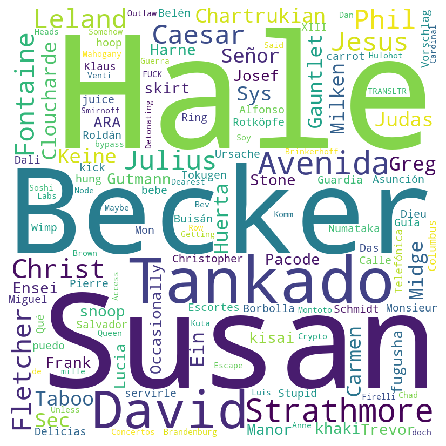

In [42]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(unique_extracted_full_names_string)
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**STEP 9 :** In most of the book , the protagonist is always introduced first. 
By that logic we take an intersection of most common 50 words , proper nouns and human names.
And the first name to appear in this intersection will be our protagonist

In [43]:
for hum_nam in unique_extracted_full_names:
    if final_proper_nouns[0][0] in hum_nam:
        protagonist = hum_nam
        print("Protagonist of the book is :",protagonist)
    break

Protagonist of the book is : Susan Fletcher


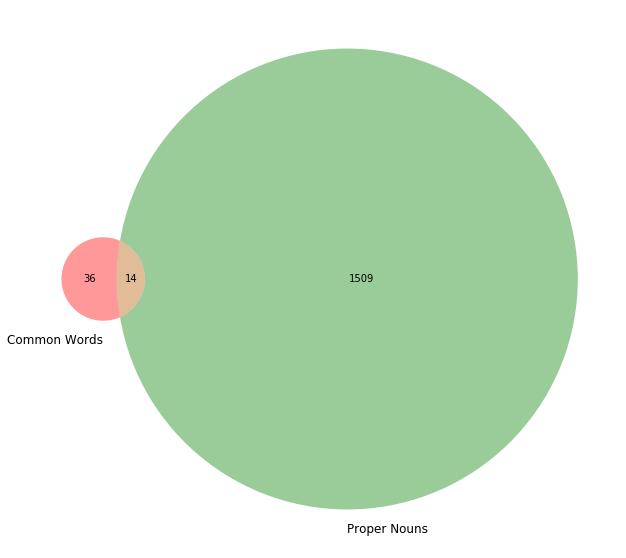

In [44]:
plt.figure(figsize=(15, 10))
venn2([set(common_word_names), set(digital_fortress_proper_nouns_name)], set_labels=['Common Words', 'Proper Nouns'])

In [45]:
print('The intersection between the two groups is \n{}'.format(set(common_word_names).intersection(set(digital_fortress_proper_nouns_name))))

The intersection between the two groups is 
{'David', 'Strathmore', 'Fontaine', 'NSA', 'Becker', 'Midge', 'Hale', 'Jabba', 'Tankado', 'Susan', 'Brinkerhoff', 'TRANSLTR', 'A', 'Crypto'}


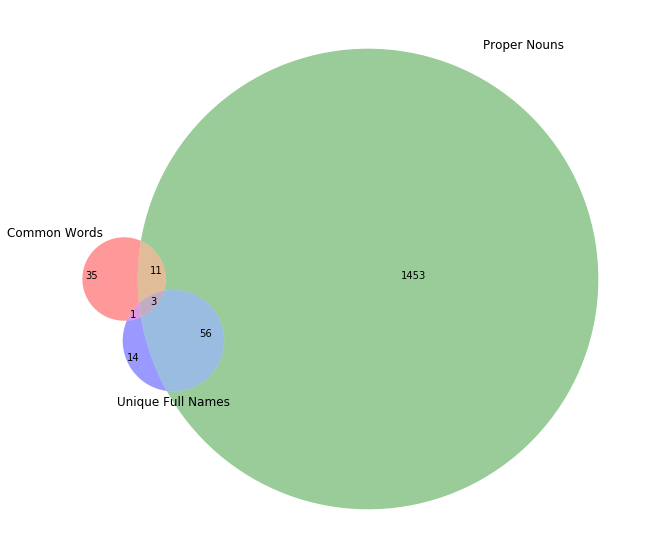

In [46]:
plt.figure(figsize=(25, 10))
venn3([set(common_word_names), 
       set(digital_fortress_proper_nouns_name), 
       set([uni_name.split(' ')[0] for uni_name in unique_extracted_full_names])], 
      set_labels=['Common Words', 'Proper Nouns', 'Unique Full Names'])

In [47]:
print('The intersection between the three groups is \n{}'.format(set(common_word_names).intersection(set(digital_fortress_proper_nouns_name).intersection(set([uni_name.split(' ')[0] for uni_name in unique_extracted_full_names])))))

The intersection between the three groups is 
{'David', 'Susan', 'Midge'}


## Generic function for  finding the Protagonist

In [48]:
def find_protagonist(processed_book):
    processed_book_words = nltk.word_tokenize(processed_book)
    processed_book_words=[word for word in processed_book_words if word.isalpha()]
    processed_book_fdist = FreqDist(processed_book_words)
  #  print("Tokenized Sentence:",processed_book_fdist)
    processed_book_filtered_sent=[]
    for w in processed_book_words:
        if w not in stop_words:
            processed_book_filtered_sent.append(w)
#     print("Tokenized Sentence:",processed_book_words)
   # print("Filterd Sentence:",processed_book_filtered_sent)
    processed_book_fdist_fil = FreqDist(processed_book_filtered_sent)
    most_common_words = processed_book_fdist_fil.most_common(10)
    pos_processed_book=nltk.pos_tag(processed_book_fdist_fil)
   
    proper_nouns=[s for s in pos_processed_book if s[1] == 'NNP']
   # print("Filterd Sentence:",pos_processed_book)
    common_proper_nouns = []
    for word in most_common_words:
        for proper_noun in proper_nouns:
            if word[0] == proper_noun[0]:
                common_proper_nouns.append(word)
    extracted_names = extract_names(processed_book)
    extracted_full_names = [ex_na for ex_na in extracted_names if ex_na.count(" ") == 1]
    unique_full_names = unique(extracted_full_names)
   # print(extracted_full_names)
    for hum_nam in unique_full_names:
        if common_proper_nouns[0][0] in hum_nam:
            return hum_nam
    return common_proper_nouns[0][0]

In [49]:
lost_symbol_prota = find_protagonist(lost_symbol)

In [50]:
lost_symbol_prota

'Robert Langdon'

In [55]:
digi_fort_prota = find_protagonist(digital_fortress)

In [56]:
digi_fort_prota 

'Susan Fletcher'

In [57]:
da_vinci_prota = find_protagonist(da_vinci_code)

In [58]:
da_vinci_prota

'Robert Langdon'